In [1507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1508]:
df=pd.read_csv('Datos_limpios_chicago.csv')
df.head()

,Unnamed: 0.1,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,t,"['email', 'phone']",t,t,...,4.99,4.99,4.98,4.95,4.94,1.0,0.0,1.0,0.0,2.08
1,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,t,"['email', 'phone']",t,t,...,4.57,4.91,4.87,4.90,4.75,1.0,1.0,0.0,0.0,2.94
2,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,t,"['email', 'phone', 'work_email']",t,t,...,4.81,4.84,4.87,4.98,4.72,5.0,5.0,0.0,0.0,0.82
3,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,f,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,4.81,1.0,0.0,1.0,0.0,0.14
4,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,t,"['email', 'phone']",t,t,...,4.75,4.93,4.86,4.92,4.71,1.0,1.0,0.0,0.0,1.34


In [1509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  8269 non-null   int64  
 1   listing_url                                   8269 non-null   object 
 2   host_name                                     8269 non-null   object 
 3   host_since                                    8269 non-null   object 
 4   host_location                                 8269 non-null   object 
 5   host_response_time                            8269 non-null   object 
 6   host_is_superhost                             8269 non-null   object 
 7   host_verifications                            8269 non-null   object 
 8   host_has_profile_pic                          8269 non-null   object 
 9   host_identity_verified                        8269 non-null   o

PRICE VS PRIVATE ROOM

<Axes: xlabel='room_type', ylabel='price'>

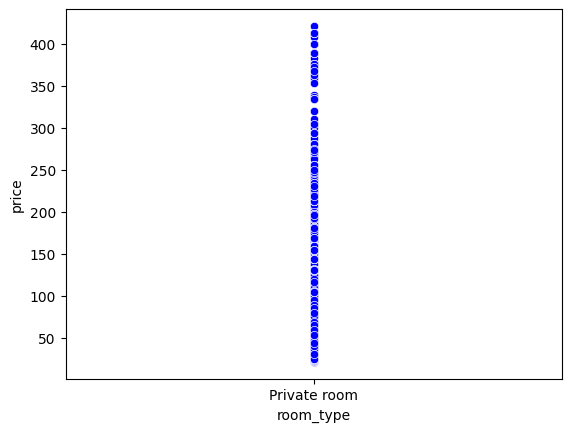

In [1510]:
df_private_room = df[df['room_type'] == 'Private room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_private_room, color='blue')

PRICE VS SHARED ROOM

<Axes: xlabel='room_type', ylabel='price'>

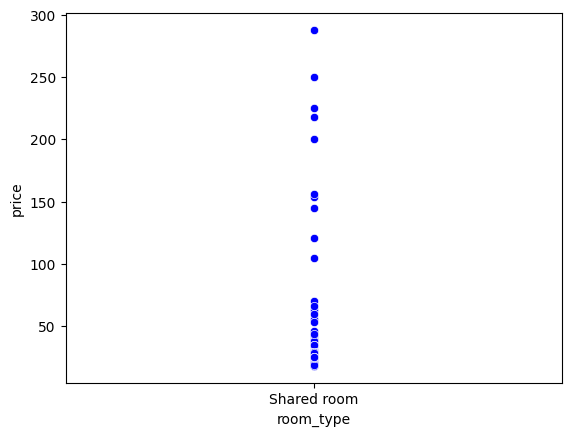

In [1511]:
df_shared_room = df[df['room_type'] == 'Shared room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_shared_room, color='blue')

PRICE VS ENTIRE HOME

<Axes: xlabel='room_type', ylabel='price'>

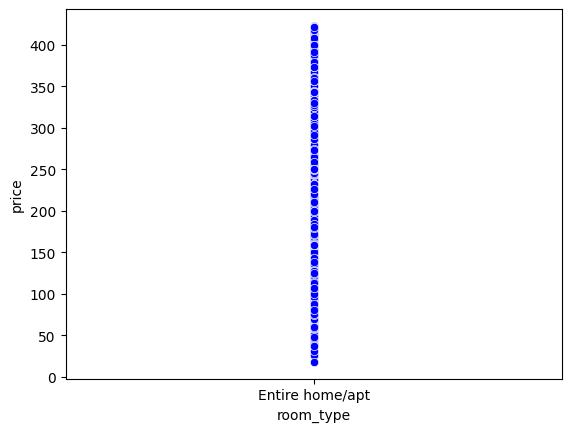

In [1512]:
df_entire_home = df[df['room_type'] == 'Entire home/apt'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_entire_home, color='blue')

PRICE VS HOTEL ROOM

<Axes: xlabel='room_type', ylabel='price'>

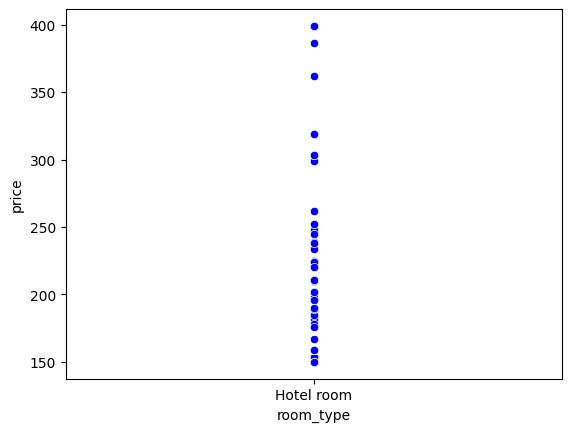

In [1513]:
df_hotel_room = df[df['room_type'] == 'Hotel room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_hotel_room, color='blue')

Cambiando variables de tipo String a Float

In [1514]:
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})
df["host_identity_verified"] = df["host_identity_verified"].map({"t": 1, "f": 0})
df["instant_bookable"] = df["instant_bookable"].map({"t": 1, "f": 0})
frecuencias = df['property_type'].value_counts()
df['property_type'] = df['property_type'].map(frecuencias)
frecuencias2 = df['room_type'].value_counts()
df['room_type'] = df['room_type'].map(frecuencias2)

PRICE VS ROOM_TYPE

<Axes: xlabel='room_type', ylabel='price'>

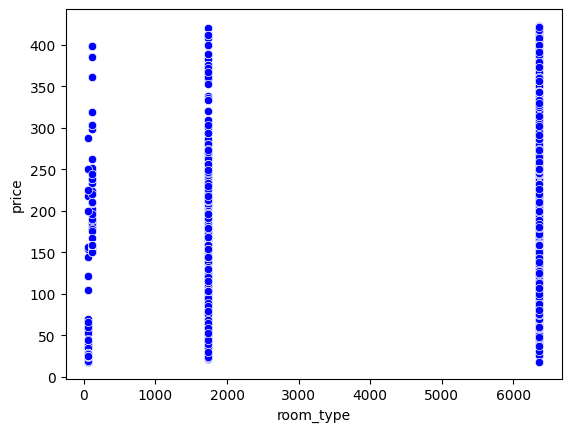

In [1515]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='room_type', y='price', color="blue", data=df)

In [1516]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['room_type']]
Var_Dep= df['price']

In [1517]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1518]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1519]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01383125]),
 'rank_': 1,
 'singular_': array([184378.46530772]),
 'intercept_': np.float64(85.94022040540882)}

*Modelo matematico: y = 0.01383125x + 85.94022040540882*

In [1520]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['room_type']])
y_pred

array([109.88212174, 173.90699829, 173.90699829, ..., 173.90699829,
       109.88212174, 173.90699829], shape=(8269,))

In [1521]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion0', y_pred)
df

,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,1,"['email', 'phone']",t,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,1,"['email', 'phone']",t,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,1,"['email', 'phone', 'work_email']",t,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,0,"['email', 'phone']",t,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,1,"['email', 'phone']",t,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,1,"['email', 'phone']",t,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",within an hour,1,"['email', 'phone']",t,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",within a few hours,1,"['email', 'phone']",t,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",within an hour,1,"['email', 'phone']",t,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='room_type', ylabel='price'>

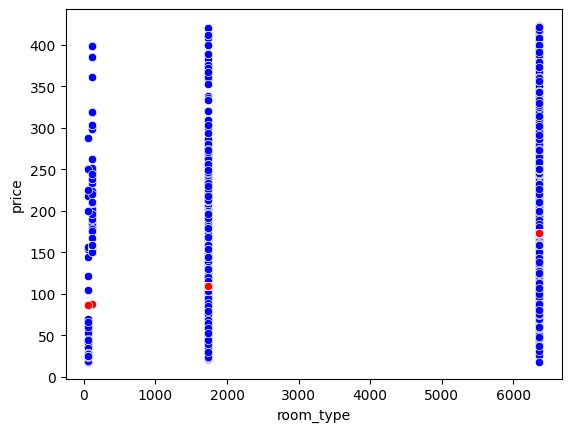

In [1522]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='room_type', y='price', color="blue", data=df)
sns.scatterplot(x='room_type', y='Prediccion0', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1523]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.11805830927741146

In [1524]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.34359614269867966)

PRICE VS HOST_ACCEPTANCE_RATE

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

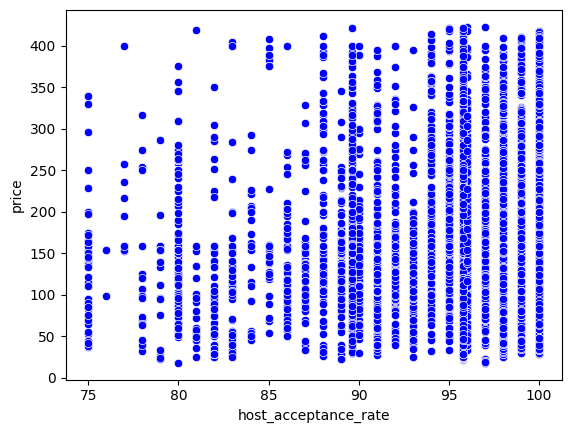

In [1525]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [1526]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['price']

In [1527]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1528]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1529]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.27331374]),
 'rank_': 1,
 'singular_': array([463.86348002]),
 'intercept_': np.float64(132.45737261136549)}

*Modelo matematico: y = 0.27331374 + 132.45737261136549*

In [1530]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_acceptance_rate']])
y_pred

array([156.50898137, 159.7887462 , 158.42217752, ..., 155.9623539 ,
       159.24211873, 159.51543247], shape=(8269,))

In [1531]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion1', y_pred)
df

,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,1,"['email', 'phone']",...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,1,"['email', 'phone']",...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,1,"['email', 'phone', 'work_email']",...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,0,"['email', 'phone']",...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,1,"['email', 'phone']",...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,1,"['email', 'phone']",...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",within an hour,1,"['email', 'phone']",...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",within a few hours,1,"['email', 'phone']",...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",within an hour,1,"['email', 'phone']",...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

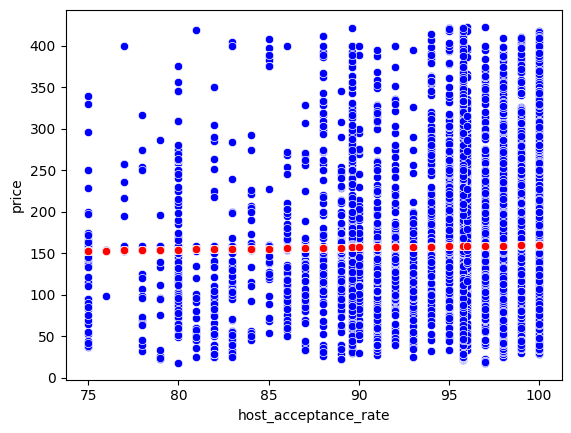

In [1532]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Prediccion1', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1533]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00029178053135492377

In [1534]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

C:\Users\yack_\AppData\Roaming\Python\Python313\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


np.float64(0.017081584568034776)

PRICE VS HOST_IS_SUPERHOST

<Axes: xlabel='host_is_superhost', ylabel='price'>

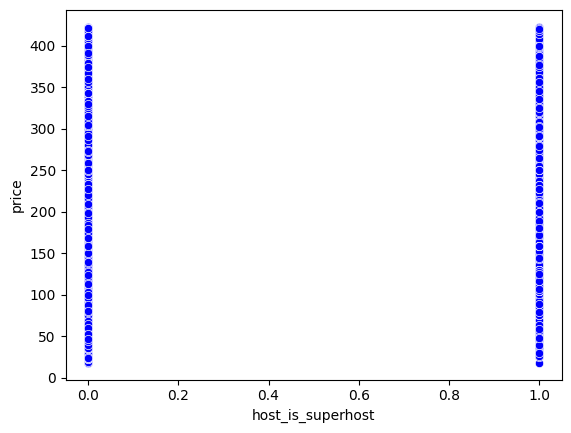

In [1535]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [1536]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_is_superhost']]
Var_Dep= df['price']

In [1537]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1538]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1539]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.14311717]),
 'rank_': 1,
 'singular_': array([45.18412098]),
 'intercept_': np.float64(155.46624591947761)}

*Modelo matematico: y = 0.7.14311717x + 155.46624591947761*

In [1540]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_is_superhost']])
y_pred

array([162.60936309, 162.60936309, 162.60936309, ..., 162.60936309,
       162.60936309, 155.46624592], shape=(8269,))

In [1541]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion2', y_pred)
df

,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,host_location,host_response_time,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,1,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,1,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,1,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,0,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,1,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,1,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",within an hour,1,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",within a few hours,1,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",within an hour,1,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='host_is_superhost', ylabel='price'>

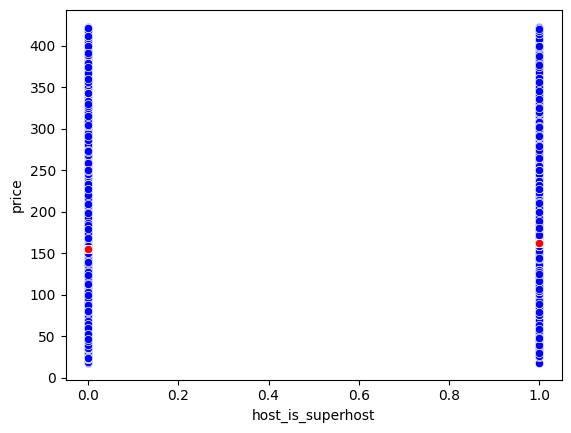

In [1542]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Prediccion2', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1543]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.001891037991505251

In [1544]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04348606663639804)

ACCOMMODATES VS BATHROOMS

<Axes: xlabel='bathrooms', ylabel='accommodates'>

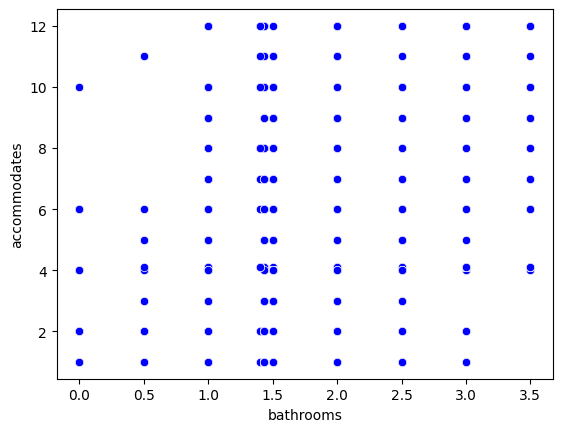

In [1545]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [1546]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['bathrooms']]
Var_Dep= df['accommodates']

In [1547]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1548]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1549]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.07075648]),
 'rank_': 1,
 'singular_': array([52.54952834]),
 'intercept_': np.float64(1.2886471532177635)}

*Modelo matematico: y = 2.07075648x + 1.2886471532177635*

In [1550]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['bathrooms']])
y_pred

array([3.35940364, 3.35940364, 3.35940364, ..., 5.43016012, 3.35940364,
       3.35940364], shape=(8269,))

In [1551]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion3', y_pred)
df

,Prediccion3,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.359404,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,within an hour,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,3.359404,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",within an hour,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,3.359404,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",within an hour,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,3.359404,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",within an hour,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,5.430160,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,within a few hours,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,3.359404,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",within an hour,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,5.430160,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",within an hour,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,5.430160,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",within a few hours,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,3.359404,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",within an hour,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='bathrooms', ylabel='accommodates'>

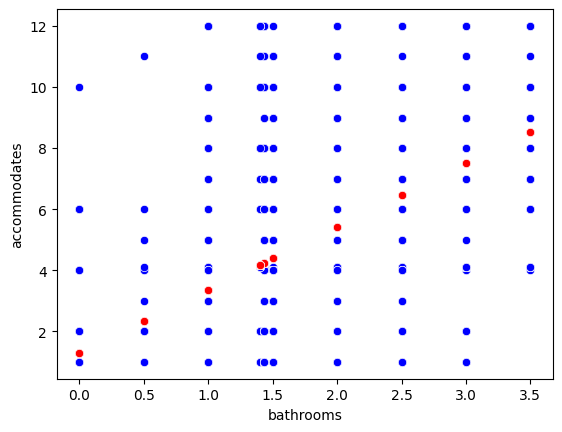

In [1552]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Prediccion3', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1553]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.23645973242163776

In [1554]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.4862712539536321)

PRICE VS REVIEW_SCORES_CLEANLINESS

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

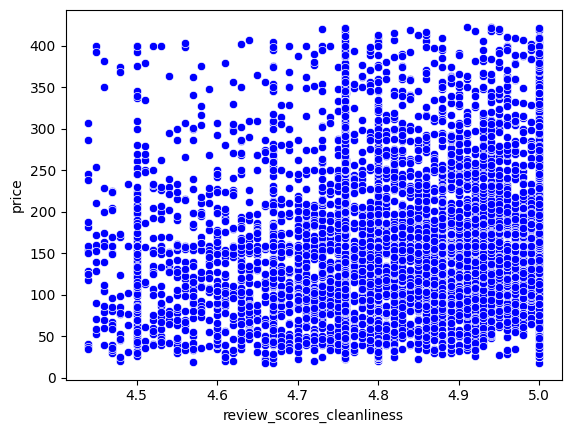

In [1555]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [1556]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['review_scores_cleanliness']]
Var_Dep= df['price']

In [1557]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1558]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1559]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([48.05574908]),
 'rank_': 1,
 'singular_': array([11.80817377]),
 'intercept_': np.float64(-73.5900597183925)}

*Modelo matematico: y = 48.05574908 + -73.5900597183925*

In [1560]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['review_scores_cleanliness']])
y_pred

array([166.20812817, 146.02471356, 157.55809334, ..., 155.08716874,
       155.08716874, 155.08716874], shape=(8269,))

In [1561]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion4', y_pred)
df

,Prediccion4,Prediccion3,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,166.208128,3.359404,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,Desconocido,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,146.024714,3.359404,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,"Chicago, IL",...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,157.558093,3.359404,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,"Chicago, IL",...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,166.688686,3.359404,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,"Chicago, IL",...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,154.674748,5.430160,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,Italy,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,155.087169,3.359404,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,"Cashton, WI",...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,155.087169,5.430160,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,"Chicago, IL",...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,155.087169,5.430160,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,"Chicago, IL",...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,155.087169,3.359404,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,"Chicago, IL",...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

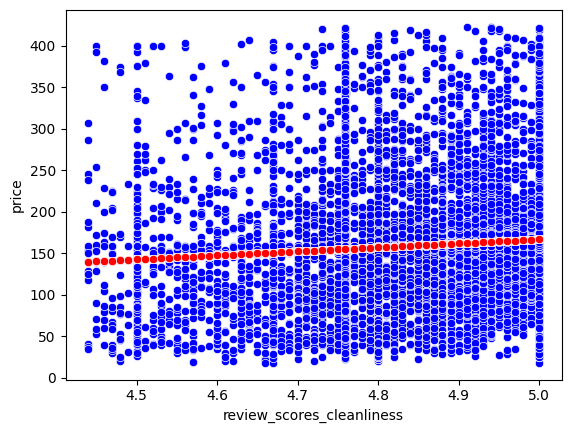

In [1562]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion4', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1563]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0058453322776652605

In [1564]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.07645477275922845)

PRICE VS HOST_IDENTITY_VERIFIED

<Axes: xlabel='host_identity_verified', ylabel='price'>

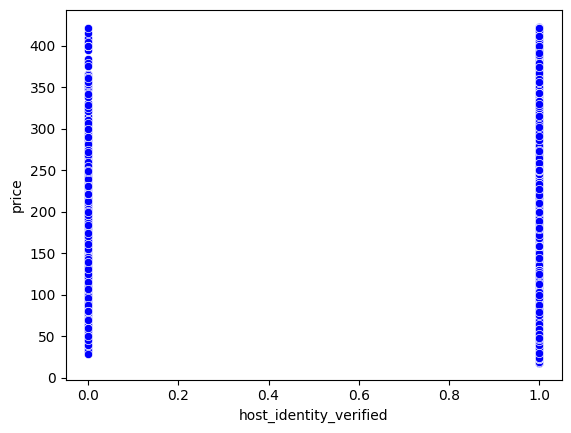

In [1565]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

In [1566]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_identity_verified']]
Var_Dep= df['price']

In [1567]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1568]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1569]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.12584389]),
 'rank_': 1,
 'singular_': array([26.19283911]),
 'intercept_': np.float64(162.38913907284777)}

*Modelo matematico: y = -4.12584389x + 162.38913907284777*

In [1570]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_identity_verified']])
y_pred

array([158.26329518, 158.26329518, 158.26329518, ..., 158.26329518,
       158.26329518, 162.38913907], shape=(8269,))

In [1571]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion5', y_pred)
df

,Prediccion5,Prediccion4,Prediccion3,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,158.263295,166.208128,3.359404,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,29/08/2008,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,158.263295,146.024714,3.359404,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,19/05/2009,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,158.263295,157.558093,3.359404,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,21/08/2009,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,158.263295,166.688686,3.359404,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,18/10/2009,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,158.263295,154.674748,5.430160,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,25/07/2009,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,158.263295,155.087169,3.359404,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,26/10/2016,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,158.263295,155.087169,5.430160,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,07/03/2016,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,158.263295,155.087169,5.430160,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,19/06/2017,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,158.263295,155.087169,3.359404,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,19/12/2015,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='host_identity_verified', ylabel='price'>

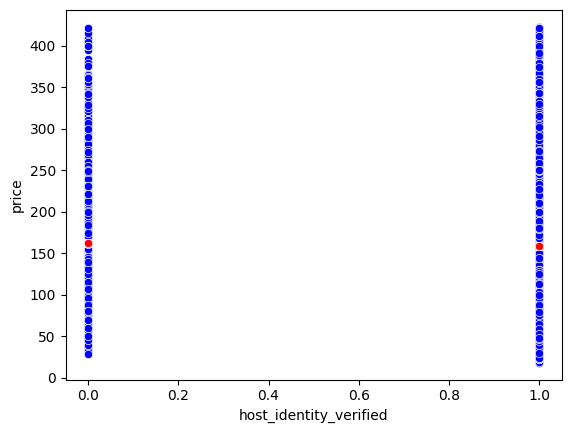

In [1572]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Prediccion5', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1573]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00021200385765896002

In [1574]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.014560352250510975)

PRICE VS INSTANT_BOOKABLE

<Axes: xlabel='instant_bookable', ylabel='price'>

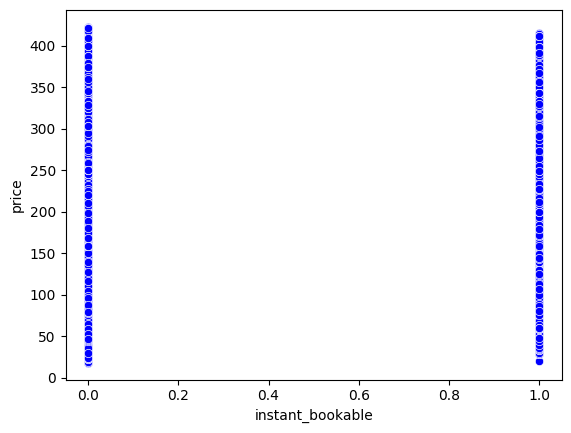

In [1575]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [1576]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['instant_bookable']]
Var_Dep= df['price']

In [1577]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1578]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1579]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.24622403]),
 'rank_': 1,
 'singular_': array([43.87798196]),
 'intercept_': np.float64(155.22844001533153)}

*Modelo matematico: y = 9.24622403x + 155.22844001533153*

In [1580]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['instant_bookable']])
y_pred

array([155.22844002, 155.22844002, 164.47466404, ..., 155.22844002,
       155.22844002, 164.47466404], shape=(8269,))

In [1581]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion6', y_pred)
df

,Prediccion6,Prediccion5,Prediccion4,Prediccion3,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,155.228440,158.263295,166.208128,3.359404,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,Rebecca,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,155.228440,158.263295,146.024714,3.359404,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,Sarah,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,164.474664,158.263295,157.558093,3.359404,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,At Home Inn,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,155.228440,158.263295,166.688686,3.359404,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,Shay And Robert,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,155.228440,158.263295,154.674748,5.430160,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,Lauri,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,164.474664,158.263295,155.087169,3.359404,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,Valora Kendra,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,164.474664,158.263295,155.087169,5.430160,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,Patricia,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,155.228440,158.263295,155.087169,5.430160,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,Vladimir,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,155.228440,158.263295,155.087169,3.359404,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,Eva,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='instant_bookable', ylabel='price'>

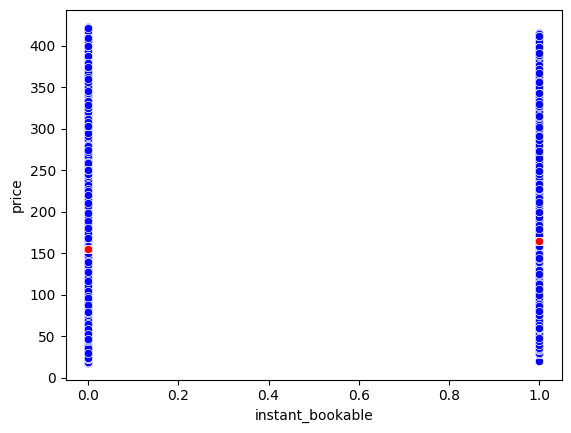

In [1582]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Prediccion6', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1583]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.002987962510629383

In [1584]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0546622585577049)

PRICE VS PROPERTY_TYPE

<Axes: xlabel='property_type', ylabel='price'>

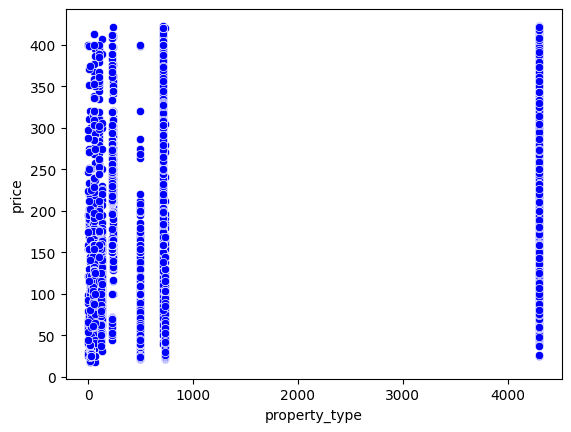

In [1585]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [1586]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['property_type']]
Var_Dep= df['price']

In [1587]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1588]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1589]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00416959]),
 'rank_': 1,
 'singular_': array([173581.30913623]),
 'intercept_': np.float64(148.3320423555048)}

*Modelo matematico: y = 0.00416959x + 148.3320423555048*

In [1590]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['property_type']])
y_pred

array([148.8407322 , 166.25293546, 166.25293546, ..., 166.25293546,
       148.8407322 , 166.25293546], shape=(8269,))

In [1591]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion7', y_pred)
df

,Prediccion7,Prediccion6,Prediccion5,Prediccion4,Prediccion3,Prediccion2,Prediccion1,Prediccion0,Unnamed: 0.1,listing_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,148.840732,155.228440,158.263295,166.208128,3.359404,162.609363,156.508981,109.882122,0,https://www.airbnb.com/rooms/2384,...,4.990000,4.990000,4.980000,4.950000,4.9400,1.0,0.0,1.0,0.0,2.080000
1,166.252935,155.228440,158.263295,146.024714,3.359404,162.609363,159.788746,173.906998,1,https://www.airbnb.com/rooms/7126,...,4.570000,4.910000,4.870000,4.900000,4.7500,1.0,1.0,0.0,0.0,2.940000
2,166.252935,164.474664,158.263295,157.558093,3.359404,162.609363,158.422178,173.906998,2,https://www.airbnb.com/rooms/10945,...,4.810000,4.840000,4.870000,4.980000,4.7200,5.0,5.0,0.0,0.0,0.820000
3,148.573879,155.228440,158.263295,166.688686,3.359404,155.466246,152.955903,109.882122,3,https://www.airbnb.com/rooms/12140,...,5.000000,5.000000,5.000000,5.000000,4.8100,1.0,0.0,1.0,0.0,0.140000
4,148.607235,155.228440,158.263295,154.674748,5.430160,162.609363,156.508981,173.906998,4,https://www.airbnb.com/rooms/28749,...,4.750000,4.930000,4.860000,4.920000,4.7100,1.0,1.0,0.0,0.0,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,166.252935,164.474664,158.263295,155.087169,3.359404,162.609363,159.788746,173.906998,8264,https://www.airbnb.com/rooms/1246505616545117832,...,4.758582,4.844255,4.858064,4.756297,4.6704,1.0,1.0,0.0,0.0,1.964281
8265,166.252935,164.474664,158.263295,155.087169,5.430160,162.609363,159.515432,173.906998,8265,https://www.airbnb.com/rooms/1246520637932735784,...,4.758582,4.844255,4.858064,4.756297,4.6704,17.0,17.0,0.0,0.0,1.964281
8266,166.252935,155.228440,158.263295,155.087169,5.430160,162.609363,155.962354,173.906998,8266,https://www.airbnb.com/rooms/1246620570694363906,...,4.758582,4.844255,4.858064,4.756297,4.6704,2.0,2.0,0.0,0.0,1.964281
8267,148.840732,155.228440,158.263295,155.087169,3.359404,162.609363,159.242119,109.882122,8267,https://www.airbnb.com/rooms/1246639379562163059,...,4.758582,4.844255,4.858064,4.756297,4.6704,6.0,3.0,0.2,0.0,1.964281


<Axes: xlabel='instant_bookable', ylabel='price'>

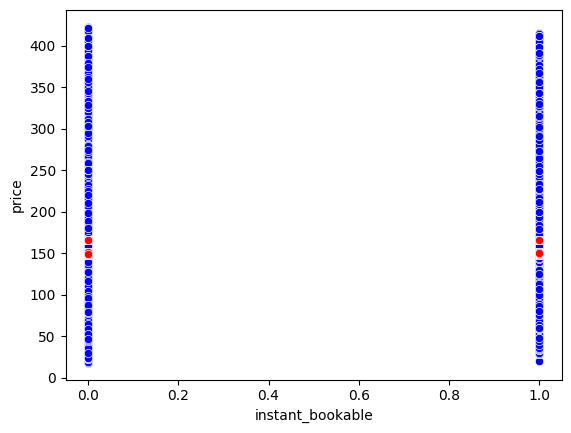

In [1592]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Prediccion7', color="red", data=df)

#sns.lineplot(x='alcohol')

In [1593]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.009509231602759294

In [1594]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.09751528907181321)

In [1595]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Prediccion7                                   8269 non-null   float64
 1   Prediccion6                                   8269 non-null   float64
 2   Prediccion5                                   8269 non-null   float64
 3   Prediccion4                                   8269 non-null   float64
 4   Prediccion3                                   8269 non-null   float64
 5   Prediccion2                                   8269 non-null   float64
 6   Prediccion1                                   8269 non-null   float64
 7   Prediccion0                                   8269 non-null   float64
 8   Unnamed: 0.1                                  8269 non-null   int64  
 9   listing_url                                   8269 non-null   o

In [1596]:
filtro = df.loc[:, ["Prediccion0", "Prediccion1", "Prediccion2", "Prediccion3", "Prediccion4", 
                    "Prediccion5", "Prediccion6", "Prediccion7", "host_id", 
                    "host_acceptance_rate", "host_is_superhost", "host_total_listings_count", 
                    "room_type", "accommodates", "bedrooms", "price", 
                    "review_scores_value", "reviews_per_month"]]
filtro

,Prediccion0,Prediccion1,Prediccion2,Prediccion3,Prediccion4,Prediccion5,Prediccion6,Prediccion7,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,price,review_scores_value,reviews_per_month
0,109.882122,156.508981,162.609363,3.359404,166.208128,158.263295,155.228440,148.840732,2613,88.0,1,1.0,1731,1.0,1.0,125.0,4.9400,2.080000
1,173.906998,159.788746,162.609363,3.359404,146.024714,158.263295,155.228440,166.252935,17928,100.0,1,2.0,6360,2.0,1.0,94.0,4.7500,2.940000
2,173.906998,158.422178,162.609363,3.359404,157.558093,158.263295,164.474664,166.252935,33004,95.0,1,11.1,6360,4.0,2.0,174.0,4.7200,0.820000
3,109.882122,152.955903,155.466246,3.359404,166.688686,158.263295,155.228440,148.573879,46734,75.0,0,1.0,1731,3.0,1.0,339.0,4.8100,0.140000
4,173.906998,156.508981,162.609363,5.430160,154.674748,158.263295,155.228440,148.607235,27506,88.0,1,7.0,6360,6.0,3.0,200.0,4.7100,1.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,173.906998,159.788746,162.609363,3.359404,155.087169,158.263295,164.474664,166.252935,101370587,100.0,1,3.0,6360,5.0,2.0,48.0,4.6704,1.964281
8265,173.906998,159.515432,162.609363,5.430160,155.087169,158.263295,164.474664,166.252935,62022982,99.0,1,18.0,6360,8.0,2.0,125.0,4.6704,1.964281
8266,173.906998,155.962354,162.609363,5.430160,155.087169,158.263295,155.228440,166.252935,135843543,86.0,1,2.0,6360,5.0,2.0,181.0,4.6704,1.964281
8267,109.882122,159.242119,162.609363,3.359404,155.087169,158.263295,155.228440,148.840732,51767459,98.0,1,8.0,1731,4.0,2.0,79.0,4.6704,1.964281


In [1597]:
#Encontramos todas las correlaciones entre las variables
#Encontramos todas las correlaciones entre las variables
Corr_Factors=filtro.corr()
Corr_Factors

,Prediccion0,Prediccion1,Prediccion2,Prediccion3,Prediccion4,Prediccion5,Prediccion6,Prediccion7,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,price,review_scores_value,reviews_per_month
Prediccion0,1.000000,0.054868,0.086093,0.080056,0.092679,0.051111,-0.053202,0.579751,-0.107134,0.054868,0.086093,-0.066015,1.000000,0.411443,0.312679,0.343596,0.013596,0.154358
Prediccion1,0.054868,1.000000,0.165631,0.036771,0.015074,-0.012814,0.220956,0.061089,-0.002916,1.000000,0.165631,-0.072558,0.054868,0.096359,0.058902,0.017082,0.019016,0.154076
Prediccion2,0.086093,0.165631,1.000000,0.079077,0.258998,0.009756,-0.109246,-0.029510,-0.162884,0.165631,1.000000,-0.009138,0.086093,0.148660,0.139447,0.043486,0.217706,0.154159
Prediccion3,0.080056,0.036771,0.079077,1.000000,0.021675,0.005461,0.002996,-0.162809,-0.019554,0.036771,0.079077,0.072639,0.080056,0.486271,0.355259,0.292947,0.030774,0.021090
Prediccion4,0.092679,0.015074,0.258998,0.021675,1.000000,0.006569,-0.102786,0.017657,-0.100341,0.015074,0.258998,-0.092057,0.092679,0.050748,0.066722,0.076455,0.544965,-0.072474
Prediccion5,0.051111,-0.012814,0.009756,0.005461,0.006569,1.000000,-0.045742,-0.022281,0.007306,-0.012814,0.009756,-0.019073,0.051111,0.035818,0.064408,0.014560,0.018003,0.000566
Prediccion6,-0.053202,0.220956,-0.109246,0.002996,-0.102786,-0.045742,1.000000,0.064783,0.124541,0.220956,-0.109246,0.167935,-0.053202,-0.035427,-0.088872,0.054662,-0.138384,0.031892
Prediccion7,0.579751,0.061089,-0.029510,-0.162809,0.017657,-0.022281,0.064783,1.000000,-0.017347,0.061089,-0.029510,-0.015405,0.579751,0.093756,0.112337,0.097515,-0.043857,0.144359
host_id,-0.107134,-0.002916,-0.162884,-0.019554,-0.100341,0.007306,0.124541,-0.017347,1.000000,-0.002916,-0.162884,0.091634,-0.107134,-0.027288,-0.057936,0.026573,-0.140757,0.105618
host_acceptance_rate,0.054868,1.000000,0.165631,0.036771,0.015074,-0.012814,0.220956,0.061089,-0.002916,1.000000,0.165631,-0.072558,0.054868,0.096359,0.058902,0.017082,0.019016,0.154076


In [1598]:
#Encontramos el valor absoluto de todas las correlaciones 
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Prediccion0,Prediccion1,Prediccion2,Prediccion3,Prediccion4,Prediccion5,Prediccion6,Prediccion7,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,price,review_scores_value,reviews_per_month
Prediccion0,1.000000,0.054868,0.086093,0.080056,0.092679,0.051111,0.053202,0.579751,0.107134,0.054868,0.086093,0.066015,1.000000,0.411443,0.312679,0.343596,0.013596,0.154358
Prediccion1,0.054868,1.000000,0.165631,0.036771,0.015074,0.012814,0.220956,0.061089,0.002916,1.000000,0.165631,0.072558,0.054868,0.096359,0.058902,0.017082,0.019016,0.154076
Prediccion2,0.086093,0.165631,1.000000,0.079077,0.258998,0.009756,0.109246,0.029510,0.162884,0.165631,1.000000,0.009138,0.086093,0.148660,0.139447,0.043486,0.217706,0.154159
Prediccion3,0.080056,0.036771,0.079077,1.000000,0.021675,0.005461,0.002996,0.162809,0.019554,0.036771,0.079077,0.072639,0.080056,0.486271,0.355259,0.292947,0.030774,0.021090
Prediccion4,0.092679,0.015074,0.258998,0.021675,1.000000,0.006569,0.102786,0.017657,0.100341,0.015074,0.258998,0.092057,0.092679,0.050748,0.066722,0.076455,0.544965,0.072474
Prediccion5,0.051111,0.012814,0.009756,0.005461,0.006569,1.000000,0.045742,0.022281,0.007306,0.012814,0.009756,0.019073,0.051111,0.035818,0.064408,0.014560,0.018003,0.000566
Prediccion6,0.053202,0.220956,0.109246,0.002996,0.102786,0.045742,1.000000,0.064783,0.124541,0.220956,0.109246,0.167935,0.053202,0.035427,0.088872,0.054662,0.138384,0.031892
Prediccion7,0.579751,0.061089,0.029510,0.162809,0.017657,0.022281,0.064783,1.000000,0.017347,0.061089,0.029510,0.015405,0.579751,0.093756,0.112337,0.097515,0.043857,0.144359
host_id,0.107134,0.002916,0.162884,0.019554,0.100341,0.007306,0.124541,0.017347,1.000000,0.002916,0.162884,0.091634,0.107134,0.027288,0.057936,0.026573,0.140757,0.105618
host_acceptance_rate,0.054868,1.000000,0.165631,0.036771,0.015074,0.012814,0.220956,0.061089,0.002916,1.000000,0.165631,0.072558,0.054868,0.096359,0.058902,0.017082,0.019016,0.154076


<Axes: >

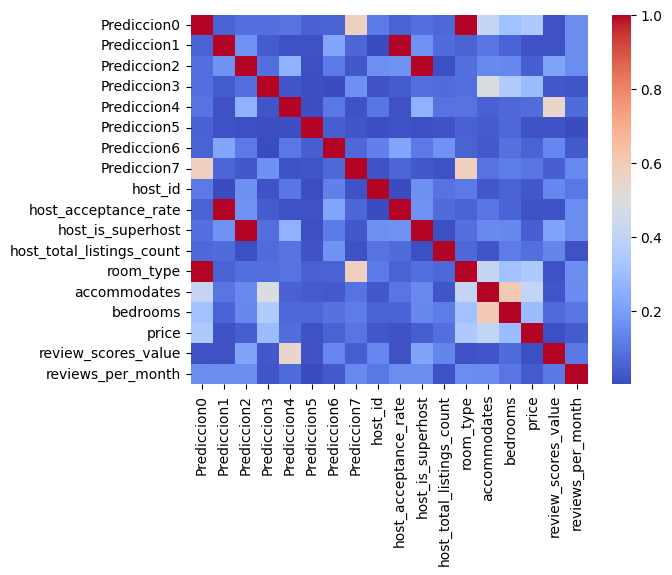

In [1599]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map

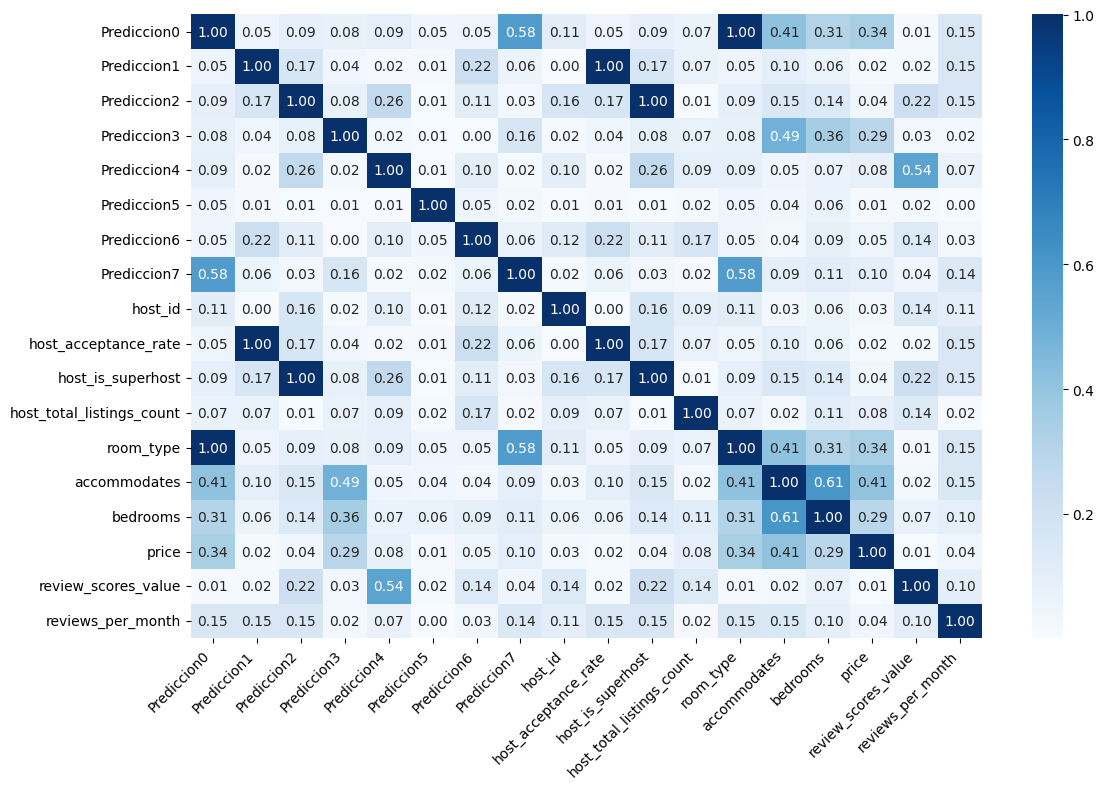

In [1600]:
#Ajustamos el mapa de calor de los coeficientes de correlacion
plt.figure(figsize=(12, 8))  

# Generamos el mapa de calor
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")

plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X
plt.yticks(rotation=0)  # Mantener etiquetas del eje Y horizontales
plt.tight_layout()
plt.show()